In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

# Examples on converting to other formats

In [2]:
from distgen.drivers import run_distgen

import os

In [3]:
beam = run_distgen(inputs='data/rad.gaussian.in.yaml', verbose=1)

Distribution format: gpt
Output file: rad.gaussian.out.txt

Creating beam distribution....
   Beam starting from: cathode
   Total charge: 10 pC.
   Number of macroparticles: 200000.
   Assuming cylindrical symmetry...
   r distribution: radial Gaussian
   theta distribution:       min_theta = 0 rad, max_theta = 6.28319 rad
[3.1415769457050644e-05 6.283153891410129e-05 9.424730837115194e-05 ... 6.283091059871215 6.283122475640672 6.283153891410129] radian
   t distribution: uniform
      min_t = -2 ps, max_t = 2 ps
   px distribution: Gaussian
      avg_px = 0 eV/c, sigma_px = 276.857 eV/c
   py distribution: Gaussian
      avg_py = 0 eV/c, sigma_py = 276.857 eV/c
   pz distribution: Gaussian
      avg_pz = 0 eV/c, sigma_pz = 276.857 eV/c
   Scaling sigma_x -> 2 mm
   Shifting avg_x -> 0 mm
   Scaling sigma_y -> 2 mm
   Shifting avg_y -> 0 mm
   Scaling sigma_px -> 276.857 eV/c
   Shifting avg_px -> 0 eV/c
   Scaling sigma_py -> 276.857 eV/c
   Shifting avg_py -> 0 eV/c
   Scaling sigm

In [4]:
# convert to simple data
beam.data()

{'n_particle': 200000,
 'species': 'electron',
 'weight': array([5.e-17, 5.e-17, 5.e-17, ..., 5.e-17, 5.e-17, 5.e-17]),
 'status': array([1, 1, 1, ..., 1, 1, 1]),
 'x': array([0.00128902, 0.00305076, 0.00214569, ..., 0.00260949, 0.00176679,
        0.00372237]),
 'y': array([ 5.14825056e-08,  2.02660913e-07,  2.13199098e-07, ...,
        -2.34926147e-07, -1.00008370e-07, -1.05941416e-07]),
 'z': array([0., 0., 0., ..., 0., 0., 0.]),
 'px': array([ -13.8645164 ,  129.51064923,  325.33389259, ...,  275.67821886,
        -388.46054821, -161.11136107]),
 'py': array([ 173.64324877,  321.9789644 , -482.08501661, ...,  250.89066605,
         486.05741996, -320.2610391 ]),
 'pz': array([356.09464676, 242.9422138 , 160.51947989, ..., 162.2339175 ,
        245.05703629, 359.35728414]),
 't': array([-1.40736274e-12, -7.40252999e-14,  1.25931214e-12, ...,
         9.71015844e-13, -1.25121322e-12,  8.21242174e-14])}

# openPMD beamphysics data

In [5]:
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.plot import marginal_plot

In [6]:
P = ParticleGroup(data = beam.data())

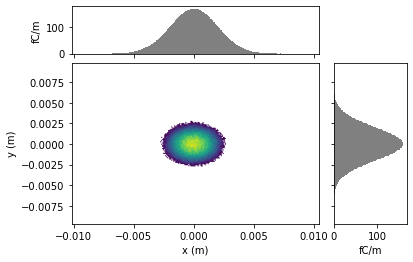

In [7]:
marginal_plot(P, 'x', 'y')

In [8]:
# Resample to fewer particles
P2 = P.resample(10000)

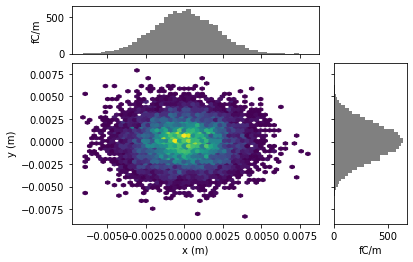

In [9]:
marginal_plot(P2, 'x', 'y')

In [10]:
# Use the ParticleGroup to write to h5
P2.write('distgen_particles.h5')

In [11]:
!pwd

/Users/colwyngulliford/Documents/GitHub/distgen/examples


In [12]:
P2.gamma

array([1.00000014, 1.00000041, 1.0000002 , ..., 1.00000035, 1.00000048,
       1.00000038])

In [13]:
from h5py import File
with File('distgen_particles.h5', 'r') as h5:
    P3 = ParticleGroup(h5)

In [14]:
P3.gamma

array([1.00000014, 1.00000041, 1.0000002 , ..., 1.00000035, 1.00000048,
       1.00000038])

In [15]:
# Cleanup
os.remove('distgen_particles.h5')
os.remove('rad.gaussian.out.txt')